In [1]:
import numpy as np
import pandas as pd
import math
import pylab
import matplotlib.pyplot as plt
import random

from numpy import arange
from numpy import meshgrid
from matplotlib import mlab
from sys import stdin
from copy import deepcopy

In [2]:
class Matrix:
    
# ИНИЦИАЛИЗАЦИЯ
    def __init__(self, matrix, LU=False, history=False):
        self.matrix = deepcopy(matrix)
        self.size = self._Size()
        if LU == True:
            self.LU, self.P, self.p = self._LUP(history)
        else:
            self.LU = None
            self.P = None
            self.p = 0
        
# ПЕЧАТЬ МАТРИЦЫ
    def __str__(self):
        return '\n'.join([''.join(['%f\t' % i for i in row]) for
                          row in self.matrix])
# РАЗМЕР МАТРИЦЫ
    def _Size(self):
        rows = len(self.matrix)
        cols = 0
        for row in self.matrix:
            if (type(row) == int) | (type(row) == float):
                break
            if len(row) > cols:
                cols = len(row)
        return (rows, cols)
    
# LUP РАЗЛОЖЕНИЕ
    def _LUP(self, history=False):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
    
        P = [i for i in range(self.size[0])]
        LU = self
        p = 0
 
        for k in range(self.size[0]):
            m = 0
            row, col = LU.Max_by_axis(k)
            if (row != k) & (LU.matrix[row][col] != 0):
                p += 1
            if LU.matrix[row][col] == 0:
                raise Exception("Столбец нулевой")
            P[k], P[row] = P[row], P[k]
            LU = Matrix.Permutation(row, col, self.size[0]).Multiply(LU)
            for i in range(k + 1, self.size[0]):
                LU.matrix[i][k] = LU.matrix[i][k] / LU.matrix[k][k]
                for j in range(k + 1, self.size[0]):
                    LU.matrix[i][j] = LU.matrix[i][j] - LU.matrix[i][k] * LU.matrix[k][j] 
            
        if history == True:
            print("P:\n{}".format(P))
        return LU, P, p

# LU
    def LU_(self, history=False):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
            
        L = Matrix.E(self.size[0])
        U = Matrix.E(self.size[0])
        
        for i in range(self.size[0]):
            U.matrix[i][i] = self.LU.matrix[i][i]
            for j in range(self.size[0]):
                if (j < i):
                    L.matrix[i][j] = self.LU.matrix[i][j]
                else:
                    U.matrix[i][j] = self.LU.matrix[i][j]
        
        if history == True:
            print("L:\n{}".format(L))
            print("U:\n{}".format(U))
            print("LU:\n{}".format(L.Multiply(U)))
        return L, U

# УМНОЖЕНИЕ   
    def Multiply(self, m):
        if self.size[1] != m.size[0]:
            raise Exception("Несоответствие размерностей: {0} {1}".format(self.size, m.size))
        #print(res.size)
        res = []
        rows = []
        #for i, row in enumerate(self.matrix):
        for i in range(self.size[0]):
            for j in range(m.size[1]):
            #for j, col in enumerate(row):
                val = 0
                for k in range(self.size[1]):
                    val += self.matrix[i][k] * m.matrix[k][j]                
                rows.append(val)    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# СУММА   
    def Sum(self, m):
        if self.size != m.size:
            raise Exception("Несоответствие размерностей: {0} {1}".format(self.size, m.size))
        res = []
        rows = []
        for i, row in enumerate(self.matrix):
            for j, col in enumerate(row):
                rows.append(self.matrix[i][j] + m.matrix[i][j])    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# УМНОЖЕНИЕ НА ЧИСЛО   
    def MultiNum(self, n):
        res = []
        rows = []
        for i, row in enumerate(self.matrix):
            for j, col in enumerate(row):
                rows.append(n * self.matrix[i][j])    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# МАКСИМАЛЬНЫЙ ЭЕЛЕМЕНТ СРОКИ ИЛИ СТОЛБЦА ПО МОДУЛЮ  
    def Max_by_axis(self, num, axis=1):
        m = 0
        num = num
        if axis == 1:
            for i in range(num, self.size[0]):
                if abs(self.matrix[i][num]) > m:
                    m = self.matrix[i][num]
                    row = i
                    col = num
        elif axis == 0:
            for i in range(self.size[1]):
                if abs(self.matrix[num][i]) > m:
                    m = self.matrix[num][i]
                    row = num
                    col = i
        else:
            raise Exception("Недопустимое значение axis")
        return row, col
    
# МАКСИМАЛЬНЫЙ ЭЛЕМЕНТ МАТРИЦЫ    
    def Max(self):
        m = -10000000000
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                if abs(self.matrix[i][j]) > m:
                    m = self.matrix[i][j]
        return m
    
# ОПРЕДЕЛИТЕЛЬ
    def Det(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
        if self.LU == None:
            self.LU, self.P, self.p = self._LUP()
        det = pow(-1, self.p)
        for k in range(self.size[0]):
            det *= self.LU.matrix[k][k]
        return det
            
# ОБРАТНАЯ МАТРИЦА
    def Reverse(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
        if self.LU == None:
            self.LU, self.P, self.p = self._LUP()
        det = self.Det()
        if det == 0:
            raise Exception("Определитель равен 0")
        res = []
        for k in range(self.size[0]):
            res.append(Gauss_LU(self, e(k, self.size[0])))
        return Matrix(res).Transpose()
    
# ТРАНСПОНИРОВАНИЕ
    def Transpose(self):
        res = self
        if self.size[0] == self.size[1]:
            for i in range(self.size[0]):
                for j in range(i + 1, self.size[0]):
                    a = res.matrix[i][j]
                    res.matrix[i][j] = res.matrix[j][i]
                    res.matrix[j][i] = a
            return res
        else:
            res = []            
            for i in range(self.size[1]):
                rows = []
                for j in range(self.size[0]):
                    rows.append(self.matrix[j][i])
                res.append(rows)
            return Matrix(res)
        
# РАВЕНСТВО МАТРИЦ
    def Equal(A, B):
        if (A.size[0] != B.size[0]) | (A.size[1] != B.size[1]):
            return False
        else:
            for i in range(A.size[0]):
                for j in range(A.size[1]):
                    if A.matrix[i][j] != B.matrix[i][j]:
                        return False
            return True
        
# СИММЕТРИЧНОСТЬ МАТРИЦЫ
    def Simmetric(m):
        if m.size[0] != m.size[1]:
            return False
        else:
            for i in range(m.size[0]):
                for j in range(i + 1, m.size[1]):
                    if m.matrix[i][j] != m.matrix[j][i]:
                        return False
            return True
    
##################  СТАТИЧЕСКИЕ  #######################

# ЕДИНИЧНАЯ МАТРИЦА
    def E(n):
        e = []
        rows = []
        for i in range(n):
            for j in range(n):
                if i == j:
                    rows.append(1)
                else:
                    rows.append(0)
            e.append(rows)
            rows = []
        return Matrix(e)

# НУЛЕВАЯ МАТРИЦА   
    def Zero(n):
        z = []
        rows = []
        for i in range(n):
            for j in range(n):
                rows.append(0)
            e.append(rows)
            rows = []
        return Matrix(z)
    
# МАТРИЦА ПЕРЕСТАНОВОК   
    def Permutation(row_col_1, row_col_2, n):
        if (row_col_1 > n) | (row_col_2 > n):
            raise Exception("Индексы за пределами массива")
        row_col_1 = row_col_1
        row_col_2 = row_col_2
        p = []
        rows = []
        for i in range(n):
            for j in range(n):
                if ((i == row_col_1) & (j == row_col_2)) | ((i == row_col_2) & (j == row_col_1)):
                    rows.append(1)
                elif (i == j) & ((i != row_col_1) & (j != row_col_2) & (i != row_col_2) & (j != row_col_1)):#(flag == True):
                    rows.append(1)                    
                else:
                    rows.append(0)
            p.append(rows)
            rows = []
        return Matrix(p)

# ВЕКТОР НАПРАВЛЕНИЯ
def e(i, n):
    e = []
    for j in range(n):
        if j == i:
            e.append(1)
        else:
            e.append(0)
    #return Matrix(e)
    return e


In [3]:
def Gauss_LU(A, b, history=False):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений") 
    L, U = A.LU_(history)
    
    x = [0] * A.size[0]
    z = [0] * A.size[0]
    n = A.size[0] 
    
    for i in range(n):
        summ = 0
        for j in range(i):
            summ += L.matrix[i][j] * z[j]
 
        z[i] = b[A.P[i]] - summ
    
    for i in range(n - 1, -1, -1):
        summ = 0
        for j in range(i + 1, n):
            summ += U.matrix[i][j] * x[j]
 
        x[i] = (z[i] - summ) / U.matrix[i][i]
    return x

# ЧАСТЬ 1 

In [4]:
def f(x):
    if x <= -2:
        raise Exception("x = {} вне области определения".format(x))
    return math.log(x + 2) - x * x

def df(x):
    if x == -2:
        raise Exception("x = {} вне области определения".format(x))
    return -2 * x + 1 / (x + 2)

def ddf(x):
    if x == -2:
        raise Exception("x = {} вне области определения".format(x))
    return -2 - 1 / ((x + 2) * (x + 2))

def phi_1(x):
    if x <= -2:
        raise Exception("x = {} вне области определения".format(x))
    return math.sqrt(math.log(x + 2))

def dphi_1(x):
    if (x <= -2) | (math.log(x + 2) == 0):
        raise Exception("x = {} вне области определения".format(x))
    return 1 / (2 * math.sqrt(math.log(x + 2)) * (x + 2))

def phi_2(x):
    return math.exp(x * x) - 2

def dphi_2(x):
    return 2 * x * math.exp(x * x)

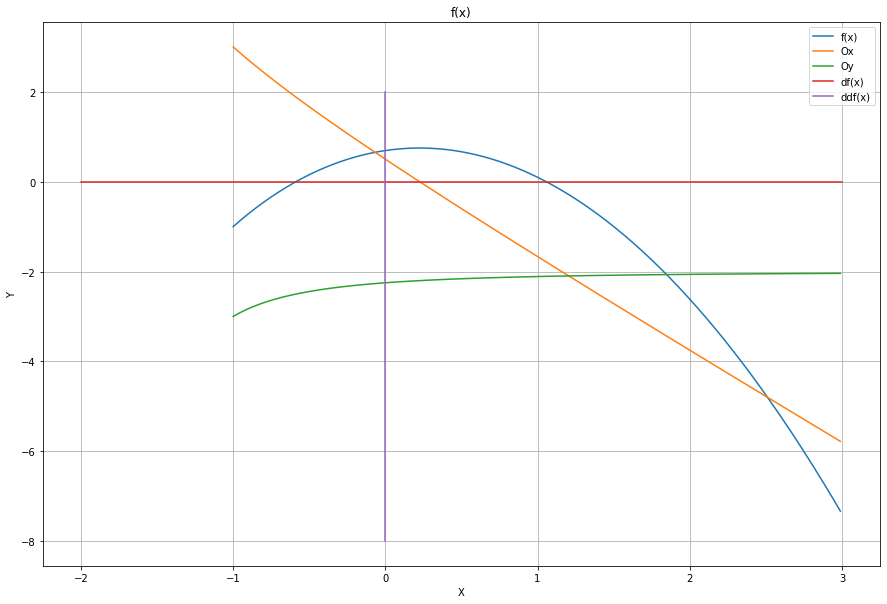

In [5]:
# ГРАФИК ФУНКЦИИ
xmin = -1.95
xmin = -1
xmax = 3
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]
dl = [df(x) for x in xarr]
ddl = [ddf(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x)')
plt.plot(xarr, ylist)
plt.plot(xarr, dl)
plt.plot(xarr, ddl)
plt.plot([-2, 3], [0, 0])
plt.plot([0, 0], [-8, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f(x)', 'Ox', 'Oy', 'df(x)', 'ddf(x)'])
plt.show()

In [6]:
def f1(x):
    if x <= -2:
        raise Exception("x вне области определения")
    return math.log(x + 2)

def f2(x):
    return x * x

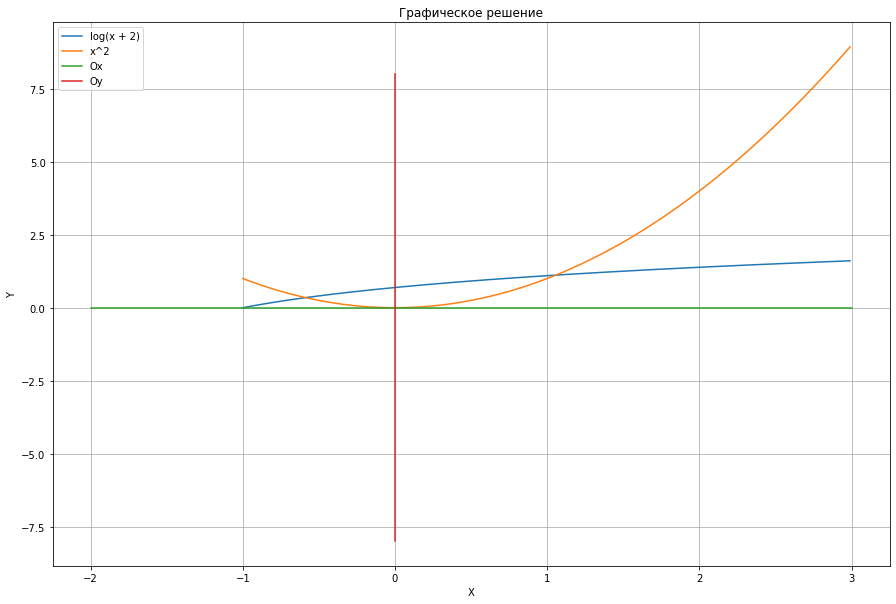

In [7]:
# ГРАФИЧЕСКОЕ РЕШЕНИЕ
xarr = np.arange(xmin, xmax, dx)
ylist1 = [f1(x) for x in xarr]
ylist2 = [f2(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('Графическое решение')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xarr, ylist1)
plt.plot(xarr, ylist2)
plt.plot([-2, 3], [0, 0])
plt.plot([0, 0], [-8, 8])
plt.legend(['log(x + 2)', 'x^2', 'Ox', 'Oy'])
plt.show()

In [8]:
def Newton(eps=0.001, a=0, b=2, x0=None, f=f, df=df, ddf=ddf):
    if f(a) * f(b) >= 0:
        raise Exception("Не выполнено необходимое условие: задайте другой отрезок")
    x = x0
    if x0 == None:
        x0 = random.uniform(a, b)
        while f(x0) * ddf(x0) <= 0:
            x0 = random.uniform(a, b)
        print(x0)
    else:
        if (x0 > b) | (x0 < a):
            raise Exception("Первое приближение должно быть внутри отрезка")            
    x = x0 - f(x0) / df(x0)
    e = abs(x - x0)
    x0 = x
    k = 1
    while e > eps:
        x = x0 - f(x0) / df(x0)
        e = abs(x - x0)
        x0 = x
        k += 1
    return x, k

def Simple_iterations(eps=0.001, a=0, b=2, x0=None, f=phi_1, df=dphi_1):
    x = a
    while x <= b:
        if (f(x) < a) | (f(x) > b):
            raise Exception("Не выполнено необходимое условие: задайте другую эквивалентную функцию (f(x) = {})".format(f(x)))
        x += eps
    q = 0.5
    k = 0
    while True:
        x = a + eps
        flag = True
        while x < b:
            if abs(df(x)) <= q:
                x += eps
            else:
                flag = False
                break
        if k == 10000:
            raise Exception("Не выполнено необходимое условие: задайте другую эквивалентную функцию (k = {})".format(k))
        elif flag == True:
            break
        else:
            q = (1 + q) / 2
            k += 1
    if x0 == None:
        x0 = random.uniform(a, b)
    else:
        if (x0 > b) | (x0 < a):
            raise Exception("Первое приближение должно быть внутри отрезка")    
    x = f(x0)
    e = (q / (1 - q)) * abs(x - x0)
    x0 = x
    k = 1
    while e > eps:
        x = f(x0)
        e = (q / (1 - q)) * abs(x - x0)
        x0 = x
        k += 1
    return x, k, q  

In [9]:
x, k = Newton()
print("Answer of Newton method: {0}\nIterations: {1}".format(x, k))

1.7679127304645945
Answer of Newton method: 1.057103555270657
Iterations: 4


In [10]:
x, k, q = Simple_iterations()
print("Answer of Simple Iterations method: {0}\nIterations: {1}\nq = {2}".format(x, k, q))

Answer of Simple Iterations method: 1.0571633365480058
Iterations: 4
q = 0.5


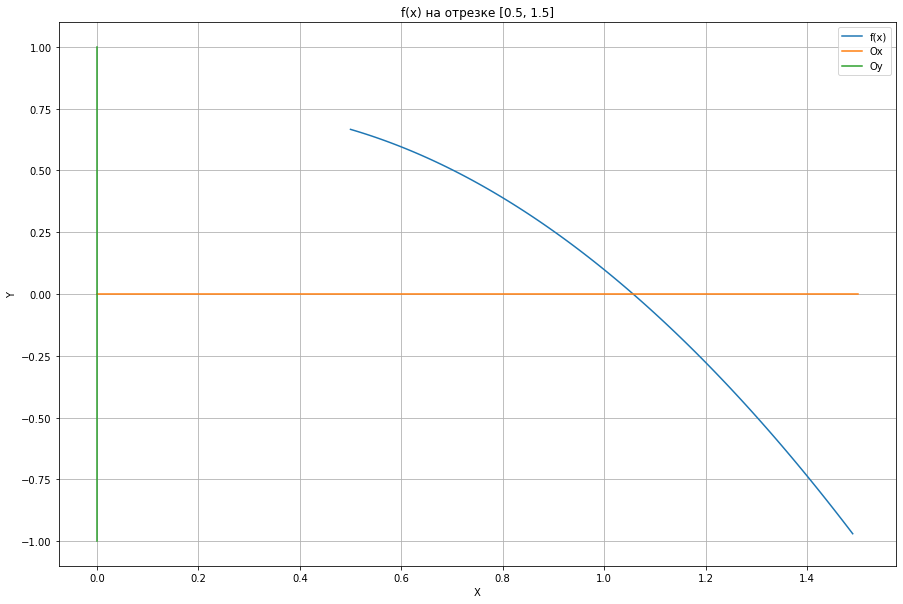

In [11]:
xmin = 0.5
xmax = 1.5
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x) на отрезке [0.5, 1.5]')
plt.plot(xarr, ylist)
plt.plot([0, 1.5], [0, 0])
plt.plot([0, 0], [-1, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f(x)', 'Ox', 'Oy'])
plt.show()

# ЧАСТЬ 2

In [12]:
def f1(x1, x2):
    return (x1 * x1 + 9) * x2 * x2 - 27

def f2(x1, x2):
    return (x1 - 1.5) * (x1 - 1.5) + (x2 - 1.5) * (x2 - 1.5) - 9

def df1_dx1(x1, x2):
    return 2 * x2 * x2 * x1

def df1_dx2(x1, x2):
    return 2 * x2 * (x1 * x1 + 9)

def df2_dx1(x1, x2):
    return 2 * (x1 - 1.5)

def df2_dx2(x1, x2):
    return 2 * (x2 - 1.5)



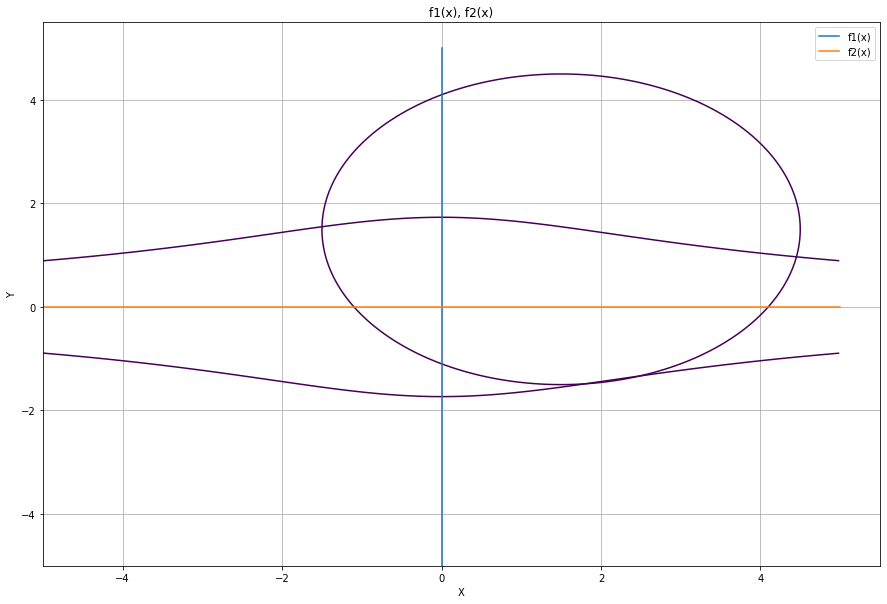

In [13]:
# ГРАФИК ФУНКЦИИЙ
xmin = -5
xmax = 5
dx = 0.01

xrange = arange(xmin, xmax, dx)
yrange = arange(xmin, xmax, dx)
X, Y = meshgrid(xrange, yrange)
F1 = f1(X, Y) 
F2 = f2(X, Y) 

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f1(x), f2(x)')

plt.contour(X, Y, F1, [0])
plt.contour(X, Y, F2, [0])

plt.plot([0, 0], [5, -5])
plt.plot([5, -5], [0, 0])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f1(x)', 'f2(x)', 'Ox', 'Oy']) 
plt.show()

In [14]:
def norm(x):
    m = 0
    for i in range(len(x)):
        if abs(x[i]) > m:
            m = abs(x[i])
    return m

def Newton_syst(eps=0.001, a=-5, b=5, x0=[4, 2], F=[f1, f2], J=[[df1_dx1, df1_dx2], [df2_dx1, df2_dx2]]):
    if len(F) != len(J):
        raise Exception("Несоответствие размерностей F и J: {0}, {1}".format(len(F), len(J)))
    if (x0 != None):
        if len(x0) != len(F):
            raise Exception("Несоответствие размерностей F и x0: {0}, {1}".format(len(F), len(x0)))
    else:
        x0 = [random.uniform(a, b)] * len(F)
    k = 0
    while True:
        k += 1
        Fk = []
        Jk = []

        for f in F:
            Fk.append(-f(x0[0], x0[1]))
        for row in J:
            rows = []
            for col in row:
                rows.append(col(x0[0], x0[1]))
            Jk.append(rows)
            
        delta = Gauss_LU(Matrix(Jk, LU=True), Fk)
        
        for i in range(len(x0)):
            x0[i] += delta[i]
        if norm(delta) < eps:
            break
    return k, x0

    

In [15]:
k, x = Newton_syst()
print("Answer of Newton method: {0}\nIterations: {1}".format(x, k))

Answer of Newton method: [4.452423945376682, 0.9678413288263374]
Iterations: 4


In [16]:
def phi1(x1, x2):
    return x1 - (1 / 109) * (25 * x1 ** 2 - 75 * x1 + 25 * x2 ** 2 - 75 * x2 - x2 * x1 ** 2 - 9 * x2 - 85.5)
    
def phi2(x1, x2):
    return x2 - (1 / 109) * (-16 * x1 ** 2 + 48 * x1 - 16 * x2 ** 2 + 48 * x2 + 5 * x2 * x1 ** 2 + 45 * x2 - 63)
    
def dphi1_dx1(x1, x2):
    return 1 - (1 / 109) * (50 * x1 - 75 - 2 * x1 * x2)

def dphi1_dx2(x1, x2):
    return - (1 / 109) * (50 * x2 - x1 ** 2 - 84)

def dphi2_dx1(x1, x2):
    return - (1 / 109) * (-32 * x1 + 48 + 10 * x1 * x2)

def dphi2_dx2(x1, x2):
    return 1 - (1 / 109) * (-32 * x2 + 5 * x1 ** 2 + 93)

In [17]:
def norm_2(x):
    m = 0
    for row in x:
        for col in row:
            if abs(col) > m:
                m = abs(col)
    return m

def Simple_syst(eps=0.001, a=0, b=5, x0=[4, 2], F=[phi1, phi2], J=[[dphi1_dx1, dphi1_dx2], [dphi2_dx1, dphi2_dx2]]):
    if len(F) != len(J):
        raise Exception("Несоответствие размерностей F и J: {0}, {1}".format(len(F), len(J)))
    if (x0 != None):
        if len(x0) != len(F):
            raise Exception("Несоответствие размерностей F и x0: {0}, {1}".format(len(F), len(x0)))
        if (x0[0] > b) | (x0[0] < a) | (x0[1] > b) | (x0[1] < a):
            raise Exception("Первое приближение должно быть внутри области")
    else:
        x0 = [random.uniform(a, b)] * len(F)
    
    xrange = arange(a, b, eps)
    q = 0.5
    k = 0
    while True:
        m = 0
        Ph = []
        
        for i in range(xrange.size):
            for j in range(xrange.size):
                for row in Ph:
                    rows = []
                    for col in row:
                        rows.append(col(xrange[i], xrange[j]))
                    Ph.append(rows)
                if norm_2(Ph) > m:
                    m = norm_2(Ph)
                
        if m <= q:
            break
        elif k == 10000:
            raise Exception("Не выполнено достаточное условие: задайте другие эквивалентные функции (k = {})".format(k))
        else:
            q = (1 + q) / 2
            k += 1
    
    k = 0
    xk = deepcopy(x0)
    delta = deepcopy(x0)
    while True:
        #print(xk)
        for i in range(len(F)):
            xk[i] = F[i](x0[0], x0[1])
            delta[i] -= xk[i]
            if (xk[i] > b) | (xk[i] < a):
                raise Exception("Не выполнено достаточное условие: задайте другие эквивалентные функции. x = {}".format(xk))
        if (q * norm(delta)) / (1 - q) < eps:
            break
        else:
            x0 = deepcopy(xk)
            delta = deepcopy(xk)
            k += 1
    return k, q, xk  

In [18]:
k, q, x = Simple_syst()
print("Answer of Simple Iterations method: {0}\nIterations: {1}\nq = {2}".format(x, k, q))

Answer of Simple Iterations method: [4.447329433034596, 0.9378510426046092]
Iterations: 58
q = 0.5


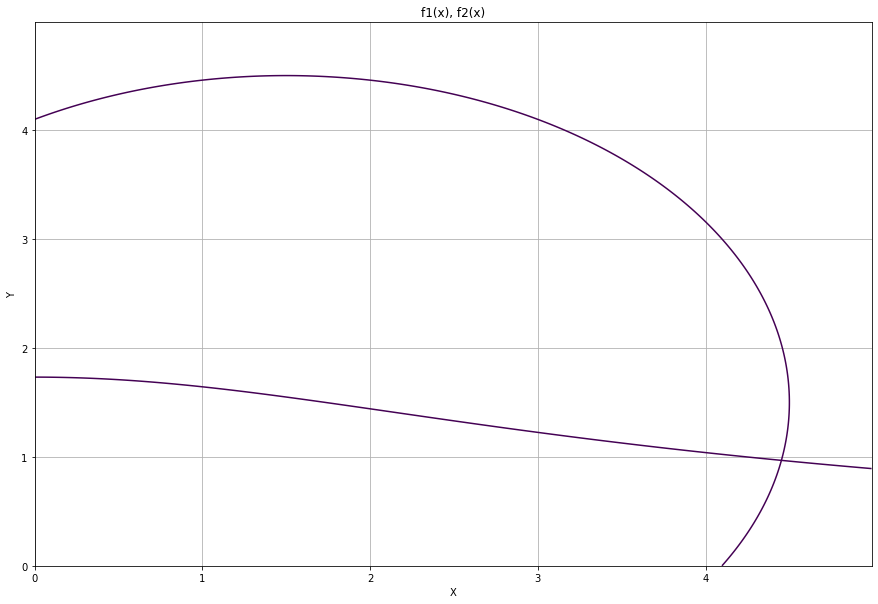

In [19]:
xmin = 0
xmax = 5
dx = 0.01

xrange = arange(xmin, xmax, dx)
yrange = arange(xmin, xmax, dx)
X, Y = meshgrid(xrange, yrange)
F1 = f1(X, Y) 
F2 = f2(X, Y) 

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f1(x), f2(x)')

plt.contour(X, Y, F1, [0])
plt.contour(X, Y, F2, [0])

plt.xlabel('X')
plt.ylabel('Y')
plt.show()